Shkinder Ivan ПК-21 Variant 3


1. Завантажте набір даних. 


In [1]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from tensorflow.keras.models import Sequential # модель прямого розповсюдження
from tensorflow.keras.layers import Dense # повнозв'язні прошарки

In [2]:
data = pd.read_csv("./clients_b.csv")


2. Виведіть заголовок таблиці (перші 5 записів).

In [3]:
data.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,28000,18,36,male,Secondary special education,Cell phones,1,2,16000,Another,2,0,1
1,1,14000,10,25,female,Secondary special education,Cell phones,0,2,24000,Another,1,1,1
2,1,8500,6,28,male,Secondary special education,Cell phones,0,2,19000,Unmarried,3,0,1
3,1,8000,12,25,female,Secondary education,Household appliances,0,2,11000,Married,3,1,1
4,1,15500,10,25,female,Secondary education,Household appliances,0,2,19000,Another,1,1,1


3. В якому форматі мітки класів?
int64

In [4]:
column_names = data.keys().values.tolist()
a = data.loc[0]

for i in range(len(column_names)):
    typeRow = type( a[column_names[i]])
    print(column_names[i],' = ',typeRow)

month  =  <class 'numpy.int64'>
credit_amount  =  <class 'numpy.int64'>
credit_term  =  <class 'numpy.int64'>
age  =  <class 'numpy.int64'>
sex  =  <class 'str'>
education  =  <class 'str'>
product_type  =  <class 'str'>
having_children_flg  =  <class 'numpy.int64'>
region  =  <class 'numpy.int64'>
income  =  <class 'numpy.int64'>
family_status  =  <class 'str'>
phone_operator  =  <class 'numpy.int64'>
is_client  =  <class 'numpy.int64'>
bad_client_target  =  <class 'numpy.int64'>


4. В якому форматі характеристики об’єктів? Чи є характеристики у вигляді
тексту? Якщо так, факторизувати дані в таких стовпцях.

In [5]:
to_factor = ['sex', 'education', 'product_type', 'family_status']

5. Наскільки збалансовані класи?

In [6]:
data['bad_client_target'].value_counts(normalize=True)

1    0.506624
0    0.493376
Name: bad_client_target, dtype: float64

6. Створити навчальний набір предикторів X та цілей Y. Перетворити мітки класів
до формату One hot encoding.

In [7]:
X = data.drop('bad_client_target', axis = 1)
X[to_factor] = X[to_factor].apply(lambda col: pd.factorize(col, sort=True)[0])
X

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client
0,1,28000,18,36,1,5,3,1,2,16000,0,2,0
1,1,14000,10,25,0,5,3,0,2,24000,0,1,1
2,1,8500,6,28,1,5,3,0,2,19000,2,3,0
3,1,8000,12,25,0,4,13,0,2,11000,1,3,1
4,1,15500,10,25,0,4,13,0,2,19000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,12,46500,24,26,1,0,8,0,2,51000,0,2,1
3091,12,18500,6,32,1,0,3,1,2,46000,0,1,1
3092,12,6500,6,24,1,5,3,0,2,18000,0,0,1
3093,12,5500,12,21,1,1,3,0,2,15000,0,1,1


In [8]:
Y = pd.get_dummies(data.bad_client_target, prefix='bad client target')
Y

,bad client target_0,bad client target_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
3090,1,0
3091,1,0
3092,1,0
3093,1,0


7. Розбити набір даних на навчальну та тестову множини.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

8. Стандартизувати предиктори X.

In [10]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

9. Створити модель нейронної мережі прямого розповсюдження. Обрати
архітектуру, активаційні функції, оптимізатор, критерії якості та метрики. Якщо
даних мало, під час навчання не використовувати валідаційну множину.

In [11]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(25, activation="relu"))
model.add(Dense(2, activation="softmax"))

10. Навчити нейронну мережу (кілька разів?).

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=50,validation_split=0.15,  batch_size=16, verbose=2)

Epoch 1/50
140/140 - 1s - loss: 0.6318 - accuracy: 0.6362 - val_loss: 0.5805 - val_accuracy: 0.6810
Epoch 2/50
140/140 - 0s - loss: 0.5743 - accuracy: 0.7110 - val_loss: 0.5406 - val_accuracy: 0.7266
Epoch 3/50
140/140 - 0s - loss: 0.5371 - accuracy: 0.7360 - val_loss: 0.5138 - val_accuracy: 0.7468
Epoch 4/50
140/140 - 0s - loss: 0.5055 - accuracy: 0.7539 - val_loss: 0.4893 - val_accuracy: 0.7646
Epoch 5/50
140/140 - 0s - loss: 0.4809 - accuracy: 0.7660 - val_loss: 0.4698 - val_accuracy: 0.7772
Epoch 6/50
140/140 - 0s - loss: 0.4563 - accuracy: 0.7875 - val_loss: 0.4621 - val_accuracy: 0.8076
Epoch 7/50
140/140 - 0s - loss: 0.4327 - accuracy: 0.8063 - val_loss: 0.4452 - val_accuracy: 0.8152
Epoch 8/50
140/140 - 0s - loss: 0.4116 - accuracy: 0.8277 - val_loss: 0.4271 - val_accuracy: 0.8203
Epoch 9/50
140/140 - 0s - loss: 0.3931 - accuracy: 0.8353 - val_loss: 0.4053 - val_accuracy: 0.8278
Epoch 10/50
140/140 - 0s - loss: 0.3721 - accuracy: 0.8474 - val_loss: 0.3914 - val_accuracy: 0.8557

11. Оцінити якість роботи навченої мережі на тестовій множині.

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

0.2186904102563858 0.9376344084739685


12. Побудувати графік залежності критерію якості (або метрики) від номеру ітерації
навчання. Проаналізувати графік і, за потреби, перенавчити мережу, врахувавши
отриману інформацію.

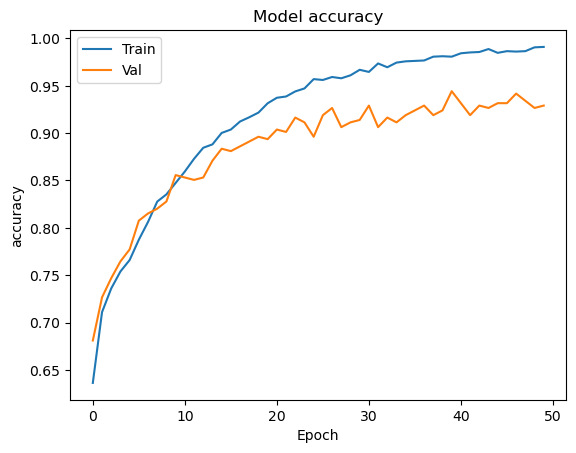

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

13. Подати на вхід навченої мережі довільний зразок із тестової вибірки. За
результатами вивести наступне повідомлення: «Передбачено клас {мітка класу}
з достовірністю {Р}%».

In [15]:
sample = X_test[0:1]
prediction = model.predict(sample)
print(prediction)
score = np.max(prediction)
prediction = np.argmax(prediction)

print(f'Передбачено: {prediction} з достовірністю {score*100:.2f}%', f'Повинно бути: {np.argmax(Y_test[0:1])}', sep='\n')

[[5.1399448e-04 9.9948597e-01]]
Передбачено: 1 з достовірністю 99.95%
Повинно бути: 1


In [16]:
model.save('mobile_price.h5')